# 基于神经网络的文本相关声纹识别

##### 导包

In [1]:
import os
import gc
import warnings
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import np_utils, plot_model
from keras.models import Sequential
from keras.layers import *
from keras import optimizers

warnings.filterwarnings('ignore')

##### 通过路径返回训练音频列表

In [2]:
# -*- coding: utf-8 -*-  
def listdir(path: str, list_name: list):
    for file in os.listdir(path):
        file_path = os.path.join(path, file)
        if os.path.isdir(file_path):
            listdir(file_path, list_name)
        elif os.path.splitext(file_path)[1] == '.wav':
            list_name.append(file_path)
    return list_name

##### 读取1200个训练音频文件名

In [3]:
list_name = list()
list_name = listdir('RawData/CASIA database', list_name)
len(list_name)

1200

In [4]:
list_name

['RawData/CASIA database\\liuchanhg\\angry\\201.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\202.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\203.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\204.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\205.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\206.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\207.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\208.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\209.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\210.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\211.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\212.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\213.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\214.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\215.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\216.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\217.wav',
 'RawData/CASIA database\\liuchanhg\\angry\\218.wav',
 'RawData/CASIA database\\li

##### 记录1200个音频的真实讲述者

In [5]:
label_list = list()
for i in range(len(list_name)):
    #     print(list_name)
    name = list_name[i]
    if "liuchanhg" in name:
        label_list.append("liuchanhg")
    if "wangzhe" in name:
        label_list.append("wangzhe")
    if "zhaoquanyin" in name:
        label_list.append("zhaoquanyin")
    if "ZhaoZuoxiang" in name:
        label_list.append("ZhaoZuoxiang")

In [6]:
len(label_list)

1200

In [7]:
label_list

['liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuchanhg',
 'liuc

In [8]:
labels = pd.DataFrame(label_list)

##### 加载音频文件，并通过MFCC算法分析其特性

In [9]:
df = pd.DataFrame(columns=['feature'])
bookmark = 0
for index, y in enumerate(list_name):
    X, sample_rate = librosa.load(y, res_type='kaiser_fast', duration=2.5, sr=22050 * 2, offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark = bookmark + 1

In [10]:
df3 = pd.DataFrame(df['feature'].values.tolist())

##### 将分析的数据与真实讲述者关联

In [11]:
newdf = pd.concat([df3, labels], axis=1)

##### 对分析的数据重新取样并用0填充错误类型NaN

In [12]:
rnewdf = shuffle(newdf)
rnewdf = rnewdf.fillna(0)
rnewdf

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
69,-7.855614,-10.337363,-11.094786,-13.600546,-16.181934,-16.251066,-16.006298,-15.977331,-17.811357,-19.258930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,liuchanhg
419,-4.859619,-7.101202,-12.513818,-13.108789,-13.040748,-11.630327,-11.504925,-13.155832,-18.417690,-21.317850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,wangzhe
543,-3.684492,-3.602926,-5.701101,-8.318999,-9.818165,-10.346111,-10.290098,-10.642239,-10.471889,-10.166179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,wangzhe
785,-13.357288,-15.336716,-24.627361,-24.129589,-23.052929,-23.181919,-24.030622,-24.269053,-21.832668,-23.471758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,zhaoquanyin
30,-5.124448,-3.698447,-3.366742,-2.307897,-1.779105,2.158702,2.385904,-2.291081,-5.143079,-7.579545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,liuchanhg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-10.904389,-5.105903,-2.852453,-0.715173,-0.423760,-1.848566,-0.824866,-0.548933,-1.785600,-1.262074,...,-14.264441,-15.481818,-16.908468,-17.877682,-22.536213,-24.896873,-25.926485,-28.506155,-25.901695,ZhaoZuoxiang
842,-26.025370,-23.240690,-23.117838,-22.288717,-22.890148,-23.629416,-21.392239,-19.433334,-18.028702,-20.330173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,zhaoquanyin
464,-31.957609,-28.903454,-20.152727,-9.328226,-6.923954,-6.643596,-6.492871,-6.743352,-7.749905,-10.067704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,wangzhe
121,-12.208991,-15.082389,-27.391737,-25.233521,-23.265816,-23.293119,-18.087873,-12.151139,-9.260474,-8.607030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,liuchanhg


##### 重新分离数据和真实讲述者

In [13]:
features = rnewdf.iloc[:, :-1]
labels = rnewdf.iloc[:, -1:]

In [14]:
features

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
69,-7.855614,-10.337363,-11.094786,-13.600546,-16.181934,-16.251066,-16.006298,-15.977331,-17.811357,-19.258930,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
419,-4.859619,-7.101202,-12.513818,-13.108789,-13.040748,-11.630327,-11.504925,-13.155832,-18.417690,-21.317850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
543,-3.684492,-3.602926,-5.701101,-8.318999,-9.818165,-10.346111,-10.290098,-10.642239,-10.471889,-10.166179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
785,-13.357288,-15.336716,-24.627361,-24.129589,-23.052929,-23.181919,-24.030622,-24.269053,-21.832668,-23.471758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
30,-5.124448,-3.698447,-3.366742,-2.307897,-1.779105,2.158702,2.385904,-2.291081,-5.143079,-7.579545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-10.904389,-5.105903,-2.852453,-0.715173,-0.423760,-1.848566,-0.824866,-0.548933,-1.785600,-1.262074,...,-15.107254,-14.264441,-15.481818,-16.908468,-17.877682,-22.536213,-24.896873,-25.926485,-28.506155,-25.901695
842,-26.025370,-23.240690,-23.117838,-22.288717,-22.890148,-23.629416,-21.392239,-19.433334,-18.028702,-20.330173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
464,-31.957609,-28.903454,-20.152727,-9.328226,-6.923954,-6.643596,-6.492871,-6.743352,-7.749905,-10.067704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,-12.208991,-15.082389,-27.391737,-25.233521,-23.265816,-23.293119,-18.087873,-12.151139,-9.260474,-8.607030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
labels

,0
69,liuchanhg
419,wangzhe
543,wangzhe
785,zhaoquanyin
30,liuchanhg
...,...
996,ZhaoZuoxiang
842,zhaoquanyin
464,wangzhe
121,liuchanhg


##### 随机分离训练和测试音频

In [16]:
X_train_val, X_test, y_train_val, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, shuffle=True, random_state=1)

##### 训练与测试音频数：720个训练音频, 240个验证音频，240个测试音频

In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(720, 216)
(240, 216)
(240, 216)
(720, 1)
(240, 1)
(240, 1)


##### 转换成numpy数组或矩阵

In [18]:
lb = LabelEncoder()

X_train = np.expand_dims(X_train, axis=2)
X_val = np.expand_dims(X_val, axis=2)
X_test = np.expand_dims(X_test, axis=2)
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_val = np_utils.to_categorical(lb.fit_transform(y_val))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

##### 建立机器学习训练模型(在model.py中单独绘制)

In [19]:
model = Sequential()

model.add(Conv1D(256, 5, padding='same', input_shape=(216, 1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=8))
model.add(Conv1D(128, 5, padding='same', ))
model.add(Activation('relu'))
model.add(Conv1D(128, 5, padding='same', ))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(4))
model.add(Activation('softmax'))
opt = optimizers.Adam(learning_rate=0.00001, decay=1e-6)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 216, 256)          1536      
                                                                 
 activation (Activation)     (None, 216, 256)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 216, 128)          163968    
                                                                 
 activation_1 (Activation)   (None, 216, 128)          0         
                                                                 
 dropout (Dropout)           (None, 216, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 27, 128)          0         
 )                                                               
                                                        

##### 绘制模型图(在model.py中单独绘制)

In [21]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

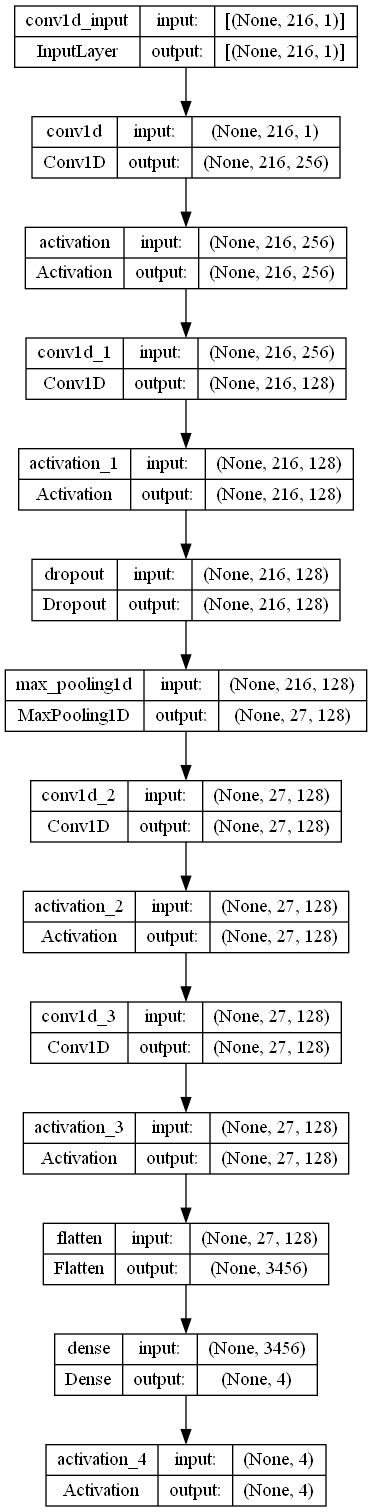

In [22]:
plot_model(model, to_file="images/model_people.png", show_shapes=True)

##### 模型训练

In [23]:
cnnhistory = model.fit(X_train, y_train, batch_size=128, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
6/6 [==============================] - 2s 269ms/step - loss: 1.5967 - accuracy: 0.2361 - val_loss: 1.4313 - val_accuracy: 0.2750
Epoch 2/500
6/6 [==============================] - 2s 274ms/step - loss: 1.4774 - accuracy: 0.2361 - val_loss: 1.3629 - val_accuracy: 0.2792
Epoch 3/500
6/6 [==============================] - 1s 230ms/step - loss: 1.3971 - accuracy: 0.2569 - val_loss: 1.3128 - val_accuracy: 0.3375
Epoch 4/500
6/6 [==============================] - 1s 231ms/step - loss: 1.3323 - accuracy: 0.3153 - val_loss: 1.2789 - val_accuracy: 0.4083
Epoch 5/500
6/6 [==============================] - 1s 238ms/step - loss: 1.2888 - accuracy: 0.3722 - val_loss: 1.2549 - val_accuracy: 0.4042
Epoch 6/500
6/6 [==============================] - 1s 235ms/step - loss: 1.2600 - accuracy: 0.3806 - val_loss: 1.2357 - val_accuracy: 0.3958
Epoch 7/500
6/6 [==============================] - 1s 231ms/step - loss: 1.2342 - accuracy: 0.4042 - val_loss: 1.2187 - val_accuracy: 0.4042
Epoch 8/500
6

##### 绘制模型的损失函数变化曲线

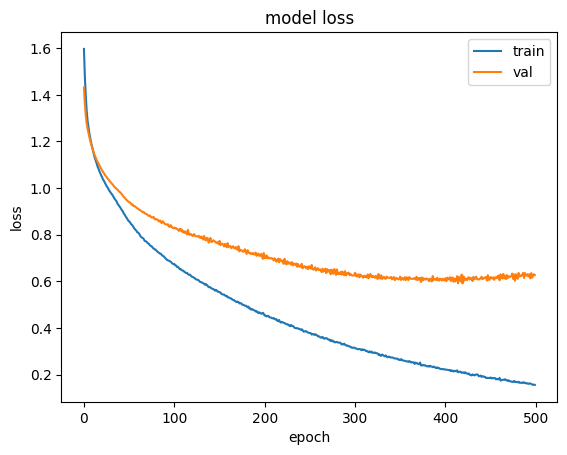

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig("images/loss.png")

##### 绘制模型准确率变化曲线

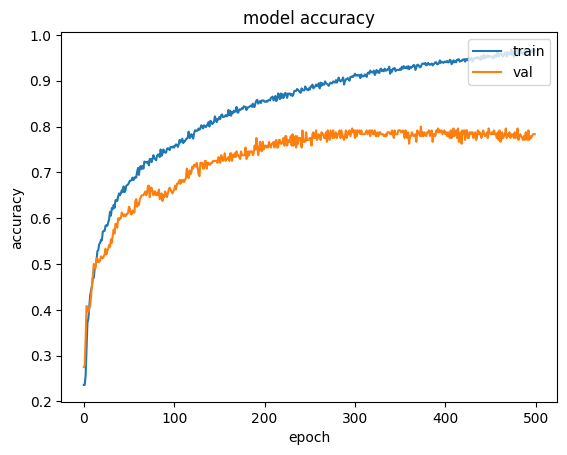

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
plt.savefig("images/accuracy.png")

##### 保存数据为.h5文件并转换为.json文件

In [26]:
model_name = 'model_people.h5'
save_dir = os.path.join(os.getcwd(), 'models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at D:\1A\Python lab\2022-Fall-Chinese-Information-Processing\models\model_people.h5 


In [27]:
model_json = model.to_json()
with open("models/model_people.json", "w") as json_file:
    json_file.write(model_json)

##### 从.json文件中加载数据

In [28]:
# loading json and creating model
from keras.models import model_from_json

json_file = open('models/model_people.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("models/model_people.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1] * 100))

Loaded model from disk
accuracy: 75.83%


##### 对测试组数据进行讲述者预测

In [29]:
preds = loaded_model.predict(X_test, batch_size=32, verbose=1)
preds

8/8 [==============================] - 1s 19ms/step


array([[1.64185241e-02, 1.75580475e-02, 8.90429318e-01, 7.55941197e-02],
       [3.54628108e-04, 1.61915254e-02, 9.81620073e-01, 1.83375191e-03],
       [4.11654636e-02, 6.74072886e-03, 9.48565304e-01, 3.52840824e-03],
       [6.17278056e-06, 3.85199528e-04, 9.99606311e-01, 2.35496827e-06],
       [1.08556691e-04, 4.70845075e-03, 9.95163918e-01, 1.91144518e-05],
       [6.94521749e-03, 4.85976040e-01, 2.46600411e-03, 5.04612744e-01],
       [1.24662712e-01, 5.20437434e-02, 7.93181539e-01, 3.01120207e-02],
       [3.35724428e-02, 5.30728921e-02, 9.10646915e-01, 2.70778802e-03],
       [6.79270446e-01, 1.14303365e-01, 1.98165730e-01, 8.26051831e-03],
       [6.98555401e-03, 8.72911215e-01, 6.51774113e-04, 1.19451448e-01],
       [5.02801850e-04, 9.92856503e-01, 4.82452568e-03, 1.81623211e-03],
       [7.66174495e-02, 1.12219170e-01, 1.27595682e-02, 7.98403740e-01],
       [1.87670084e-04, 2.39635780e-02, 9.75834846e-01, 1.39732219e-05],
       [4.14085448e-01, 5.77089250e-01, 2.81982939e

##### 预测讲述者结果

In [30]:
preds = preds.argmax(axis=1)
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform(preds))
preddf = pd.DataFrame({'predictedvalues': preds})
preddf

,predictedvalues
0,wangzhe
1,wangzhe
2,wangzhe
3,wangzhe
4,wangzhe
...,...
235,ZhaoZuoxiang
236,ZhaoZuoxiang
237,ZhaoZuoxiang
238,wangzhe


##### 真实讲述者

In [31]:
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform(actual))
actualdf = pd.DataFrame({'actualvalues': actual})
actualdf

,actualvalues
0,liuchanhg
1,wangzhe
2,ZhaoZuoxiang
3,wangzhe
4,wangzhe
...,...
235,ZhaoZuoxiang
236,ZhaoZuoxiang
237,ZhaoZuoxiang
238,wangzhe


##### 结合进行对比分析

In [32]:
finaldf = actualdf.join(preddf)
finaldf

,actualvalues,predictedvalues
0,liuchanhg,wangzhe
1,wangzhe,wangzhe
2,ZhaoZuoxiang,wangzhe
3,wangzhe,wangzhe
4,wangzhe,wangzhe
...,...,...
235,ZhaoZuoxiang,ZhaoZuoxiang
236,ZhaoZuoxiang,ZhaoZuoxiang
237,ZhaoZuoxiang,ZhaoZuoxiang
238,wangzhe,wangzhe


##### 保存结果至.csv文件

In [33]:
finaldf.to_csv('result_people.csv', index=False)

In [34]:
gc.collect()

652